# EDA - Oneplus

In [1]:
import pandas as pd

In [2]:
df_4 = pd.read_json("reddit_oneplus.json")
df_4.head()

,Title,Upvotes,URL,Created,Text
0,is the update policy of 1+ still bi-monthly se...,1,https://www.reddit.com/r/oneplus/comments/1hys...,1736588333,So far I understood Samsung and Pixel already ...
1,Unable to return my 13 (UK),1,https://www.reddit.com/r/oneplus/comments/1hyr...,1736585480,Is there something wrong with the website? The...
2,Reason to upgrade,2,https://www.reddit.com/r/oneplus/comments/1hyr...,1736584744,"Alright, so OP 13 is all the new hype right no..."
3,How does the Spigen case look with the blue ve...,1,https://www.reddit.com/r/oneplus/comments/1hyr...,1736584540,"If anyone is using this combo, I'd appreciate ..."
4,Facing UPI and banking issues on my OP6,1,https://www.reddit.com/r/oneplus/comments/1hyr...,1736583721,On my OP6 banking apps are not responding righ...


In [3]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9858 entries, 0 to 9857
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Title    9858 non-null   object
 1   Upvotes  9858 non-null   int64 
 2   URL      9858 non-null   object
 3   Created  9858 non-null   int64 
 4   Text     9858 non-null   object
dtypes: int64(2), object(3)
memory usage: 385.2+ KB


In [4]:
oneplus = df_4.drop_duplicates()

In [5]:
oneplus

,Title,Upvotes,URL,Created,Text
0,is the update policy of 1+ still bi-monthly se...,1,https://www.reddit.com/r/oneplus/comments/1hys...,1736588333,So far I understood Samsung and Pixel already ...
1,Unable to return my 13 (UK),1,https://www.reddit.com/r/oneplus/comments/1hyr...,1736585480,Is there something wrong with the website? The...
2,Reason to upgrade,2,https://www.reddit.com/r/oneplus/comments/1hyr...,1736584744,"Alright, so OP 13 is all the new hype right no..."
3,How does the Spigen case look with the blue ve...,1,https://www.reddit.com/r/oneplus/comments/1hyr...,1736584540,"If anyone is using this combo, I'd appreciate ..."
4,Facing UPI and banking issues on my OP6,1,https://www.reddit.com/r/oneplus/comments/1hyr...,1736583721,On my OP6 banking apps are not responding righ...
...,...,...,...,...,...
9722,Missing feature from oneplus 7T on new 12R,8,https://www.reddit.com/r/oneplus/comments/1hmf...,1735183114,I recently went from a 7T to a 12R and it does...
9731,OnePlus 12 $549? Or $649,78,https://i.redd.it/d8qa3rd6k29e1.jpeg,1735164923,The email promo say from $549 but all I see is...
9810,OP12 is dead,219,https://i.redd.it/bj33blhkqr8e1.jpeg,1735033898,"Need help, my OP12 suddenly blackout when I tr..."
9829,OnePlus 13 pre-order & Free gift,11,https://www.reddit.com/r/oneplus/comments/1hky...,1734992033,Greetings!\nI had preordered the OnePlus 13 an...


In [6]:
## so finally from oneplus we are able to extract around 1900 rows.

In [7]:
oneplus.describe

<bound method NDFrame.describe of                                                   Title  Upvotes  \
0     is the update policy of 1+ still bi-monthly se...        1   
1                           Unable to return my 13 (UK)        1   
2                                     Reason to upgrade        2   
3     How does the Spigen case look with the blue ve...        1   
4               Facing UPI and banking issues on my OP6        1   
...                                                 ...      ...   
9722         Missing feature from oneplus 7T on new 12R        8   
9731                           OnePlus 12 $549? Or $649       78   
9810                                       OP12 is dead      219   
9829                   OnePlus 13 pre-order & Free gift       11   
9850                                          13 or 13r        8   

                                                    URL     Created  \
0     https://www.reddit.com/r/oneplus/comments/1hys...  1736588333   
1     h

In [8]:
oneplus.isnull().sum()

Title      0
Upvotes    0
URL        0
Created    0
Text       0
dtype: int64

In [9]:
import re
import nltk
from nltk.corpus import stopwords

In [10]:
def clean_text(text):
    # this is converting my entire text to lowercase
    text = text.lower()
    
    text = re.sub(r'[^a-zA-Z\s]', '', text) # removing punctuation and non-alphabetic characters of text clumn.

    stop_words = set(stopwords.words('english'))     # Removing stopwords
    words = text.split()
    text = ' '.join([word for word in words if word not in stop_words])

    # Removing extra spaces
    text = ' '.join(text.split())

    return text

In [11]:
oneplus['Text'][2]

"Alright, so OP 13 is all the new hype right now and I've kind of been waiting for it to upgrade from my OP 8 Pro, but I'm trying to figure out if the upgrade is worth it. At first glance, it's obvious but hear me out. \n\nI'm using Before Launcher and have been for a long time. I love the simplicity. I installed it out of curiosity not thinking I would use it for more than a day, but here I am almost 2 years later still using it. So with this in mind, I'm not going to be using all of the new Android features. \n\nThe OP 8 Pro still delivers on everything I'm doing. I get 1.5 days of battery life and everything seems to work perfectly. Some apps are lagging a bit, but nothing annoying. I have the screen in 60 Hz mode to help with battery life and because I'm using Before Launcher I don't really care for 120 Hz. I don't game on my phone. I hate gaming on my phone. The camera is OK for my use. I never really cared about the camera. The phone is in perfect condition, screen doesn't have s

In [12]:
raw_text = "My OnePlus 8 Pro is overheating when I play games. Anyone else facing this issue?"

cleaned_text = clean_text(raw_text)
cleaned_text

'oneplus pro overheating play games anyone else facing issue'

In [13]:
oneplus = oneplus.drop(columns=['URL'])

In [14]:
## Clean- text

In [15]:
oneplus.loc[:, 'Text'] = oneplus['Text'].apply(clean_text)

# using Vader

In [16]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [17]:
oneplus_ana = SentimentIntensityAnalyzer() # VADER sentiment analyzer

In [18]:
## simply defining a fucntion named assign_sentiment.

def assign_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'Positive'
    elif compound_score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

In [19]:
# Apply VADER sentiment analysis
oneplus.loc[:, 'Sentiment-Vader'] = oneplus['Text'].apply(lambda x: assign_sentiment(oneplus_ana.polarity_scores(x)['compound']))

In [20]:
oneplus['Sentiment-Vader'].value_counts()

Sentiment-Vader
Positive    994
Neutral     616
Negative    330
Name: count, dtype: int64

In [21]:
import matplotlib.pyplot as plt

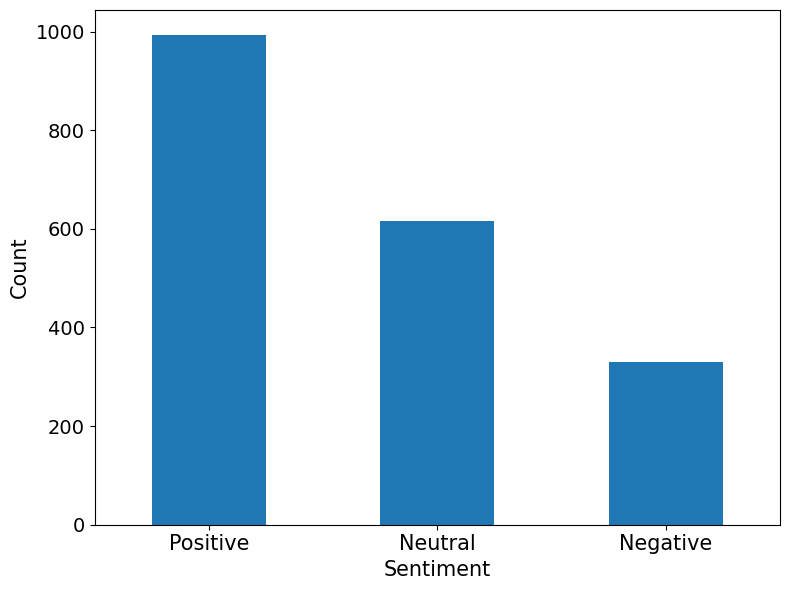

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))  # Optionally, specify figure size

# Plot the value counts of the 'Sentiment-Vader' column
oneplus['Sentiment-Vader'].value_counts().plot(kind='bar', ax=ax)

# Set the x-tick labels and rotation
ax.set_xticklabels(['Positive', 'Neutral', 'Negative'], rotation=0, fontsize=15)

# Set the y-axis tick label size
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel('Sentiment', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

# Display the plot
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

In [23]:
oneplus['Upvotes']

0         1
1         1
2         2
3         1
4         1
       ... 
9722      8
9731     78
9810    219
9829     11
9850      8
Name: Upvotes, Length: 1940, dtype: int64

In [24]:
oneplus['Upvotes'].mean

<bound method Series.mean of 0         1
1         1
2         2
3         1
4         1
       ... 
9722      8
9731     78
9810    219
9829     11
9850      8
Name: Upvotes, Length: 1940, dtype: int64>

In [25]:
oneplus['Upvotes'].mean()

35.939690721649484

In [26]:
## it simply defines the average of likes.

In [27]:
oneplus.groupby('Sentiment-Vader')

In [28]:
oneplus.groupby('Sentiment-Vader')['Upvotes'].mean()

Sentiment-Vader
Negative    14.654545
Neutral     48.754870
Positive    35.064386
Name: Upvotes, dtype: float64

<Axes: xlabel='Sentiment-Vader'>

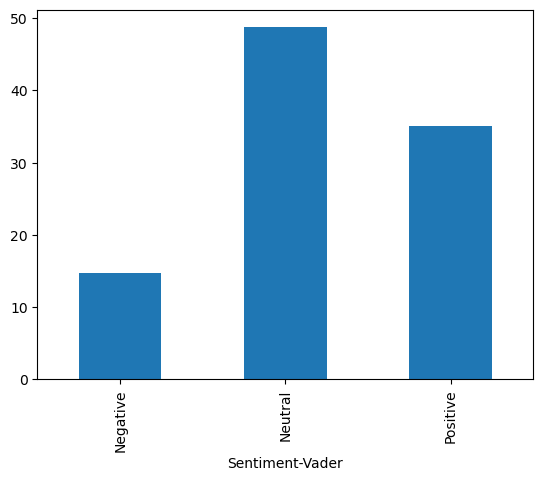

In [29]:
oneplus.groupby('Sentiment-Vader')['Upvotes'].mean().plot(kind='bar')

# Temporal Sentiment Analysis

In [30]:
oneplus['Created']  ## it is showing the timestamp, about the particular post like when it posted.

0       1736588333
1       1736585480
2       1736584744
3       1736584540
4       1736583721
           ...    
9722    1735183114
9731    1735164923
9810    1735033898
9829    1734992033
9850    1734955978
Name: Created, Length: 1940, dtype: int64

In [31]:
oneplus['Created'].unique()

array([1736588333, 1736585480, 1736584744, 1736584540, 1736583721,
       1736583706, 1736583433, 1736582827, 1736581708, 1736581586,
       1736577378, 1736574456, 1736566972, 1736565085, 1736564738,
       1736563796, 1736563366, 1736562541, 1736561505, 1736558507,
       1736558425, 1736557970, 1736557539, 1736536570, 1736538736,
       1736542377, 1736544450, 1736557098, 1736555091, 1736554257,
       1736546259, 1736553572, 1736551481, 1736551471, 1736550838,
       1736550347, 1736549846, 1736544315, 1736544096, 1736544004,
       1736542707, 1736541367, 1736540584, 1736538703, 1736537167,
       1736534480, 1736533640, 1736532589, 1736531480, 1736531260,
       1736529708, 1736530218, 1736530105, 1736529978, 1736529203,
       1736528772, 1736527947, 1736526841, 1736526904, 1736526542,
       1736526153, 1736524820, 1736524452, 1736524238, 1736522455,
       1736523029, 1736521959, 1736520469, 1736521616, 1736521251,
       1736520415, 1736518825, 1736518603, 1736518398, 1736516

In [32]:
oneplus['Created'].isna().sum()  ## simply give the count the number of missing values.

0

In [33]:
oneplus['Created'] = pd.to_datetime(oneplus['Created'],unit = 's' , errors='coerce')

In [34]:
oneplus['Created']

0      2025-01-11 09:38:53
1      2025-01-11 08:51:20
2      2025-01-11 08:39:04
3      2025-01-11 08:35:40
4      2025-01-11 08:22:01
               ...        
9722   2024-12-26 03:18:34
9731   2024-12-25 22:15:23
9810   2024-12-24 09:51:38
9829   2024-12-23 22:13:53
9850   2024-12-23 12:12:58
Name: Created, Length: 1940, dtype: datetime64[ns]

In [35]:
oneplus['Created'].unique()

<DatetimeArray>
['2025-01-11 09:38:53', '2025-01-11 08:51:20', '2025-01-11 08:39:04',
 '2025-01-11 08:35:40', '2025-01-11 08:22:01', '2025-01-11 08:21:46',
 '2025-01-11 08:17:13', '2025-01-11 08:07:07', '2025-01-11 07:48:28',
 '2025-01-11 07:46:26',
 ...
 '2024-12-23 12:45:29', '2024-12-23 12:12:58', '2024-12-23 11:06:11',
 '2024-12-23 11:00:21', '2024-12-23 10:23:49', '2024-12-23 08:43:17',
 '2024-12-23 07:54:25', '2024-12-23 07:46:25', '2024-12-23 06:40:57',
 '2025-01-11 01:06:08']
Length: 986, dtype: datetime64[ns]

In [36]:
from textblob import TextBlob

In [37]:
def for_sentiment(text):
    sentiment = oneplus_ana.polarity_scores(text)
    return sentiment['compound']  # Compound score represents overall sentiment

In [38]:
# Apply sentiment analysis to the text column
oneplus['sentiment'] = oneplus['Text'].apply(lambda x: for_sentiment(x) if isinstance(x, str) else None)

In [39]:
oneplus['sentiment'] = pd.to_numeric(oneplus['sentiment'], errors='coerce')

In [40]:
daily_sentiment = oneplus.groupby('Created')['sentiment'].mean().reset_index()

In [41]:
daily_sentiment.head()

,Created,sentiment
0,2024-12-22 17:08:44,0.8221
1,2024-12-22 19:38:28,-0.2755
2,2024-12-22 20:04:03,0.9153
3,2024-12-23 02:06:19,0.7096
4,2024-12-23 05:08:35,-0.2732


In [42]:
import matplotlib.pyplot as plt

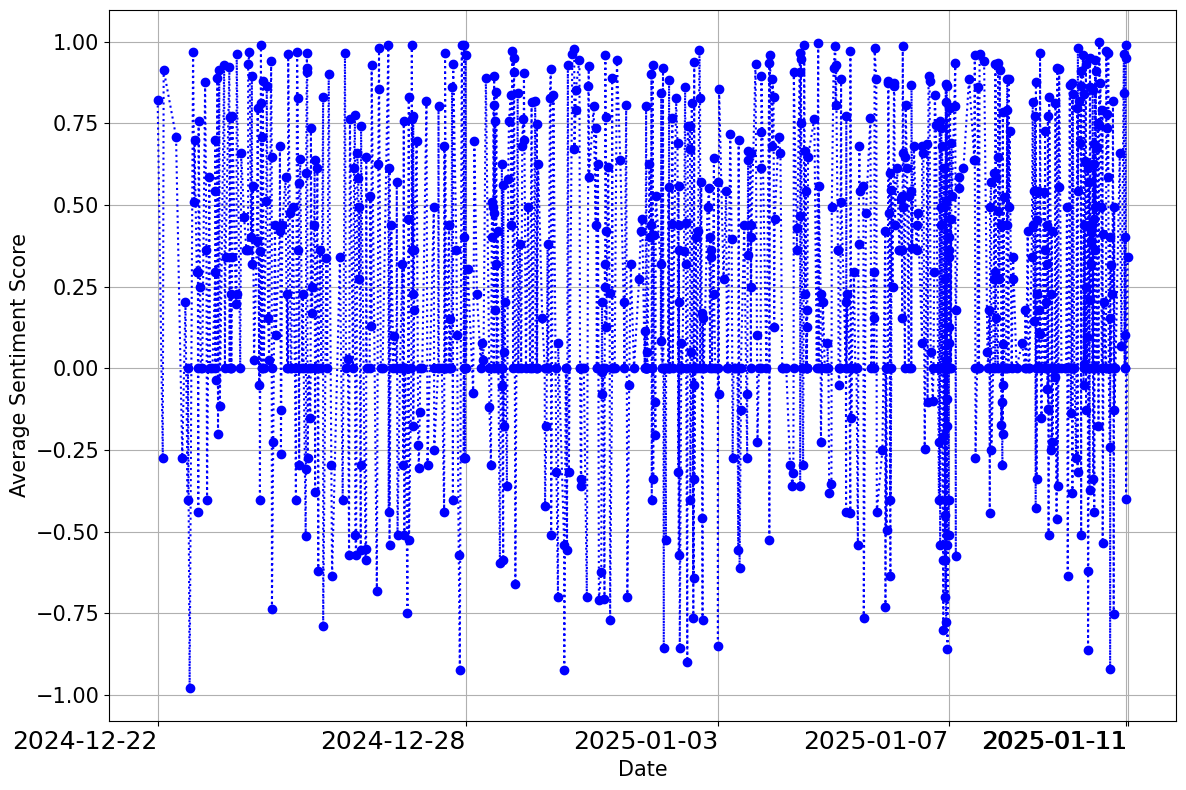

In [110]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the data with a dotted line and blue color
ax.plot(daily_sentiment['Created'], daily_sentiment['sentiment'], marker='o', linestyle=':', color='b')

# Remove the title
# plt.title('Temporal Sentiment Shifts Over Days', fontsize=18)  # Removed as per request

# Labels with larger font size
plt.xlabel('Date', fontsize=15)  # Increased font size for x-label
plt.ylabel('Average Sentiment Score', fontsize=15)  # Increased font size for y-label

# Adjust the x-ticks to show fewer labels and rotate them for clarity
plt.xticks(rotation=0, ha='right', fontsize=18)  # Increased rotation and font size for x-ticks

# Increase font size for y-ticks without changing the ticks themselves
plt.yticks(fontsize=15)  # Increased font size for y-ticks

# Set the x-ticks to show 5 values: first, last, and 3 equally spaced ones in between
num_ticks = 5
x_positions = [0, len(daily_sentiment) - 1]  # Start with first and last positions
interval = len(daily_sentiment) // (num_ticks - 1)  # Calculate interval for 3 equally spaced ticks

# Add 3 equally spaced ticks between the first and last positions
x_positions.extend(range(interval, len(daily_sentiment) - 1, interval))

# Set x-ticks based on the calculated positions
ax.set_xticks(daily_sentiment['Created'].iloc[x_positions])

# Show grid for better visibility
plt.grid(True)

# Adjust layout to prevent overlap of labels
plt.tight_layout()

# Show the plot
plt.show()

In [44]:
oneplus.head()

,Title,Upvotes,Created,Text,Sentiment-Vader,sentiment
0,is the update policy of 1+ still bi-monthly se...,1,2025-01-11 09:38:53,far understood samsung pixel already received ...,Positive,0.3400
1,Unable to return my 13 (UK),1,2025-01-11 08:51:20,something wrong website button return seems co...,Negative,-0.4005
2,Reason to upgrade,2,2025-01-11 08:39:04,alright op new hype right ive kind waiting upg...,Positive,0.9891
3,How does the Spigen case look with the blue ve...,1,2025-01-11 08:35:40,anyone using combo id appreciate could shareba...,Positive,0.9509
4,Facing UPI and banking issues on my OP6,1,2025-01-11 08:22:01,op banking apps responding right google pay wo...,Positive,0.1027


In [45]:
from wordcloud import WordCloud

In [46]:
wordcloud = WordCloud(width=800, height=400).generate(" ".join(oneplus['Text'])) # Most Frequent Words.

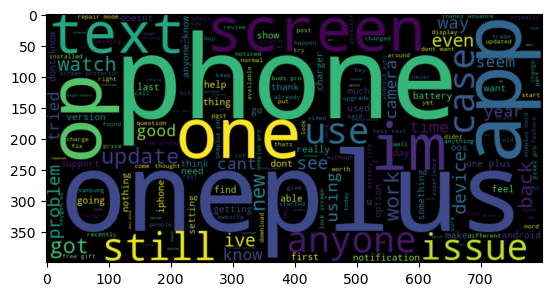

In [47]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

## Wordcloud for Positive vs Negative Sentiments

In [48]:
positive_reviews_count = len(oneplus[oneplus['Sentiment-Vader'] == 'Positive'])
negative_reviews_count = len(oneplus[oneplus['Sentiment-Vader'] == 'Negative'])

In [49]:
positive_reviews_count

994

In [50]:
negative_reviews_count

330

In [51]:
### Positive and negative review text
positive_reviews = ' '.join(oneplus[oneplus['Sentiment-Vader'] == 'Positive']['Text'])
negative_reviews = ' '.join(oneplus[oneplus['Sentiment-Vader'] == 'Negative']['Text'])

In [52]:
## Generating wordcloud
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)

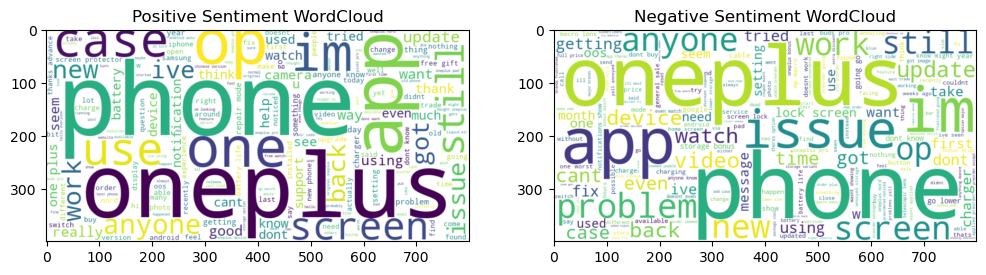

In [53]:
## plotting.
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment WordCloud')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment WordCloud')
plt.show()

In [54]:
oneplus.columns

Index(['Title', 'Upvotes', 'Created', 'Text', 'Sentiment-Vader', 'sentiment'], dtype='object')

In [55]:
def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [56]:
# Apply sentiment analysis to the text column
oneplus['Sentiment'] = oneplus['Text'].apply(lambda x: get_sentiment(x) if isinstance(x, str) else None)

In [57]:
oneplus.loc[:, 'Sentiment-TB'] = oneplus['Text'].apply(lambda x: get_sentiment(x))

In [58]:
oneplus['Sentiment-TB'].value_counts()

Sentiment-TB
Positive    978
Neutral     637
Negative    325
Name: count, dtype: int64

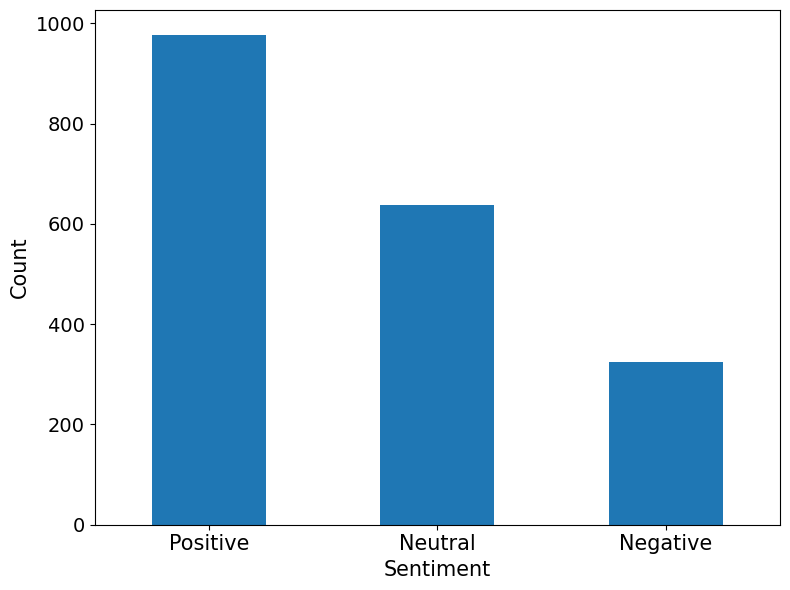

In [59]:
fig, ax = plt.subplots(figsize=(8, 6))  # Optionally, specify figure size

# Plot the value counts of the 'Sentiment-Vader' column
oneplus['Sentiment-TB'].value_counts().plot(kind='bar', ax=ax)

# Set the x-tick labels and rotation
ax.set_xticklabels(['Positive', 'Neutral', 'Negative'], rotation=0, fontsize=15)
# Set the y-axis tick label size
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel('Sentiment', fontsize=15)
ax.set_ylabel('Count', fontsize=15)


# Display the plot
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

## Keyword analysis

In [60]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
## Initializing vectorizer for topic modeling
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(oneplus['Text'])   ## fitting the required data.

In [62]:
## by applying Latent Dirichlet Allocation i.e LDA
lda = LatentDirichletAllocation(n_components=50, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=50, random_state=42)

In [63]:
# Get the top words for each topic
terms = vectorizer.get_feature_names_out()
topics = []
for topic_idx, topic in enumerate(lda.components_):
    topics.append([terms[i] for i in topic.argsort()[:-6:-1]])

In [64]:
print("Top topics:")
for idx, topic in enumerate(topics):
    print(f"Topic {idx+1}: {', '.join(topic)}")

Top topics:
Topic 1: video, previous, camera, noticed, videos
Topic 2: delete, op, watch, issue, similar
Topic 3: window, files, pictures, hidden, glass
Topic 4: trade, thoughts, happy, price, camera
Topic 5: iphone, max, plus, pro, trading
Topic 6: guys, coming, party, europe, good
Topic 7: version, drain, os, vivo, updated
Topic 8: battery, usage, means, listed, ask
Topic 9: steel, network, preorder, stock, spain
Topic 10: plus, security, purchase, tips, phone
Topic 11: updater, oxygen, update, dropped, according
Topic 12: oneplus, open, apply, magsafe, review
Topic 13: rate, fps, refresh, reddit, video
Topic 14: near, esim, light, op, discount
Topic 15: charger, phone, dont, lock, eu
Topic 16: worth, left, ear, sensor, yesterday
Topic 17: oneplus, case, coupon, ive, pad
Topic 18: life, battery, restarting, notification, ce
Topic 19: blue, white, oneplus, black, things
Topic 20: op, icon, watch, launcher, change
Topic 21: wondering, photo, cameras, mean, switching
Topic 22: protector

## Aspect-Based Sentiment Analysis

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
## Lets define the aspects like their battery health , camera quality , about screen and all from the comments that are mostly highlighting.
aspects = ['camera', 'battery', 'screen', 'performance', 'ai', 'storage', 'design', 'model']

In [67]:
vectorizer = CountVectorizer(vocabulary=aspects, stop_words='english')

In [68]:
### Transform the text data
X = vectorizer.transform(oneplus['Text'])

In [69]:
# Add column for aspect mention
oneplus.loc[:, 'Aspect-Mentions'] = X.sum(axis=1)

In [70]:
# Analyze sentiment for each given aspect such as performance, battery and all.
for aspect in aspects:
    oneplus[f'Sentiment-{aspect}'] = oneplus['Text'].apply(lambda x: 'Positive' if aspect in x and TextBlob(x).sentiment.polarity > 0 else ('Negative' if aspect in x and TextBlob(x).sentiment.polarity < 0 else 'Neutral'))

In [71]:
oneplus.loc[:, 'comparison'] = oneplus['Sentiment-Vader'] == oneplus['Sentiment-TB']

In [72]:
comparison_percentage = oneplus['comparison'].mean() * 100
comparison_percentage

74.12371134020619

In [73]:
## Finally the aspect sentiments.
aspect_sentiment = oneplus.groupby('comparison').agg({
    'Aspect-Mentions': 'sum',
    **{f'Sentiment-{aspect}': lambda x: x.value_counts().to_dict() for aspect in aspects}
}).reset_index()

In [74]:
print(aspect_sentiment)

   comparison  Aspect-Mentions  \
0       False              213   
1        True              768   

                                    Sentiment-camera  \
0    {'Neutral': 488, 'Positive': 11, 'Negative': 3}   
1  {'Neutral': 1325, 'Positive': 99, 'Negative': 14}   

                                   Sentiment-battery  \
0    {'Neutral': 484, 'Positive': 10, 'Negative': 8}   
1  {'Neutral': 1337, 'Positive': 87, 'Negative': 14}   

                                    Sentiment-screen  \
0   {'Neutral': 460, 'Positive': 26, 'Negative': 16}   
1  {'Neutral': 1254, 'Positive': 155, 'Negative':...   

                            Sentiment-performance  \
0  {'Neutral': 500, 'Negative': 1, 'Positive': 1}   
1               {'Neutral': 1425, 'Positive': 13}   

                                        Sentiment-ai  \
0   {'Neutral': 368, 'Positive': 80, 'Negative': 54}   
1  {'Neutral': 1123, 'Positive': 263, 'Negative':...   

                                  Sentiment-storage  \
0    {

## Word Frequency by Sentiment

In [75]:
positive_reviews = oneplus[oneplus['Sentiment-TB'] == 'Positive']['Text']
negative_reviews = oneplus[oneplus['Sentiment-TB'] == 'Negative']['Text']

In [76]:
vectorizer = CountVectorizer(stop_words='english', max_features=50)

In [77]:
## for the positive one

In [78]:
positive_vector = vectorizer.fit_transform(positive_reviews)
positive_words = pd.DataFrame(positive_vector.toarray(), columns=vectorizer.get_feature_names_out())
print("Top Positive Words:")
print(positive_words.sum().sort_values(ascending=False).head(20))

Top Positive Words:
oneplus    906
phone      795
im         449
op         398
like       333
screen     312
dont       254
app        242
know       229
new        206
ive        198
watch      194
case       193
got        191
apps       176
use        176
pro        168
battery    162
time       157
good       149
dtype: int64


In [79]:
## similarly for the negative one.
negative_vector = vectorizer.fit_transform(negative_reviews)
negative_words = pd.DataFrame(negative_vector.toarray(), columns=vectorizer.get_feature_names_out())
print("Top Negative Words:")
print(negative_words.sum().sort_values(ascending=False).head(20))

Top Negative Words:
oneplus    241
phone      155
im          97
screen      82
like        82
app         74
dont        73
order       66
op          64
case        58
got         58
buy         56
watch       54
issue       50
know        50
ive         47
charger     47
way         43
new         41
update      40
dtype: int64


In [80]:
## in the same way we can do for neutral one also, no major change is there.

In [81]:
## here we Comparing sum of upvotes for each sentiment label.
upvotes_comparison = oneplus.groupby(['comparison']).agg({'Upvotes': 'sum'}).reset_index()
upvotes_comparison

,comparison,Upvotes
0,False,12224
1,True,57499


In [82]:
## and in this we are Comparing each sentiment upvotes with the mean score.
avg_upvotes_sentiment = oneplus.groupby(['comparison']).agg({'Upvotes': 'mean'}).reset_index()
avg_upvotes_sentiment

,comparison,Upvotes
0,False,24.350598
1,True,39.985396


## Aspect Sentiment Based on upvotes

In [83]:
aspect_sentiment_upvotes = oneplus.groupby(['Aspect-Mentions']).agg({'Upvotes': 'sum'}).reset_index()

In [84]:
aspect_sentiment_upvotes

,Aspect-Mentions,Upvotes
0,0,57094
1,1,9622
2,2,859
3,3,409
4,4,1108
5,5,555
6,6,27
7,7,2
8,8,11
9,9,21


In [85]:
aspect_sentiment_upvotes = oneplus.groupby(['comparison', 'Aspect-Mentions']).agg({'Upvotes': 'sum'}).reset_index()

In [86]:
aspect_sentiment_upvotes

,comparison,Aspect-Mentions,Upvotes
0,False,0,11646
1,False,1,414
2,False,2,56
3,False,3,88
4,False,7,2
5,False,8,3
6,False,11,15
7,True,0,45448
8,True,1,9208
9,True,2,803


# BERT Sentiments

In [87]:
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline

In [88]:
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

In [89]:
def safe_BERT_analysis(text):
    try:
        result = sentiment_pipeline(text[:512])  # Only take the first 512 characters
        return result[0]['label']
    except Exception as e:
        print(f"Error processing text: {e}")
        return None

In [90]:
# Apply the sentiment analysis function to the 'text' column in the iPhone DataFrame
oneplus['BERT-sentiment'] = oneplus['Text'].apply(safe_BERT_analysis)

In [91]:
oneplus.head()

,Title,Upvotes,Created,Text,Sentiment-Vader,sentiment,Sentiment,Sentiment-TB,Aspect-Mentions,Sentiment-camera,Sentiment-battery,Sentiment-screen,Sentiment-performance,Sentiment-ai,Sentiment-storage,Sentiment-design,Sentiment-model,comparison,BERT-sentiment
0,is the update policy of 1+ still bi-monthly se...,1,2025-01-11 09:38:53,far understood samsung pixel already received ...,Positive,0.3400,Positive,Positive,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,True,1 star
1,Unable to return my 13 (UK),1,2025-01-11 08:51:20,something wrong website button return seems co...,Negative,-0.4005,Negative,Negative,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,True,1 star
2,Reason to upgrade,2,2025-01-11 08:39:04,alright op new hype right ive kind waiting upg...,Positive,0.9891,Positive,Positive,6,Positive,Positive,Positive,Neutral,Positive,Neutral,Neutral,Neutral,True,4 stars
3,How does the Spigen case look with the blue ve...,1,2025-01-11 08:35:40,anyone using combo id appreciate could shareba...,Positive,0.9509,Positive,Positive,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,True,3 stars
4,Facing UPI and banking issues on my OP6,1,2025-01-11 08:22:01,op banking apps responding right google pay wo...,Positive,0.1027,Positive,Positive,1,Neutral,Neutral,Positive,Neutral,Neutral,Neutral,Neutral,Neutral,True,4 stars


In [92]:
oneplus['BERT-sentiment'].value_counts()

BERT-sentiment
1 star     1028
4 stars     414
5 stars     231
3 stars     190
2 stars      77
Name: count, dtype: int64

In [93]:
new_mapping = {
    "1 star": "worst",
    "2 stars": "Bad",
    "3 stars": "Average",
    "4 stars": "Good",
    "5 stars": "Excellant"
}

In [94]:
oneplus['BERT-sentiment'] = oneplus['BERT-sentiment'].map(new_mapping)

In [109]:
oneplus['BERT-sentiment'].value_counts()

BERT-sentiment
worst        1028
Good          414
Excellant     231
Average       190
Bad            77
Name: count, dtype: int64

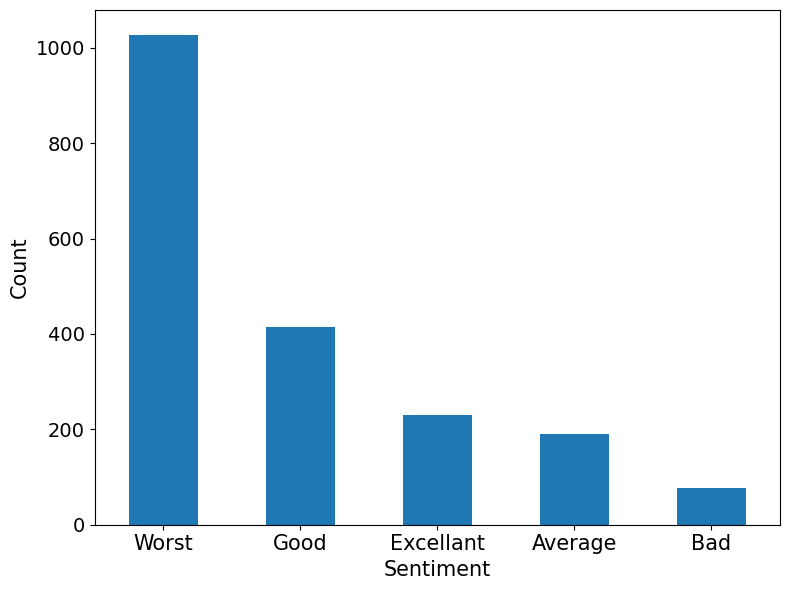

In [108]:
fig, ax = plt.subplots(figsize=(8, 6))  # Optionally, specify figure size

# Plot the value counts of the 'Sentiment-Vader' column
oneplus['BERT-sentiment'].value_counts().plot(kind='bar', ax=ax)

# Set the x-tick labels and rotation
ax.set_xticklabels(['Worst','Good','Excellant','Average','Bad'], rotation=0, fontsize=15)

# Set the y-axis tick label size
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel('Sentiment', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

# Display the plot
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

In [96]:
oneplus.head()

,Title,Upvotes,Created,Text,Sentiment-Vader,sentiment,Sentiment,Sentiment-TB,Aspect-Mentions,Sentiment-camera,Sentiment-battery,Sentiment-screen,Sentiment-performance,Sentiment-ai,Sentiment-storage,Sentiment-design,Sentiment-model,comparison,BERT-sentiment
0,is the update policy of 1+ still bi-monthly se...,1,2025-01-11 09:38:53,far understood samsung pixel already received ...,Positive,0.3400,Positive,Positive,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,True,worst
1,Unable to return my 13 (UK),1,2025-01-11 08:51:20,something wrong website button return seems co...,Negative,-0.4005,Negative,Negative,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,True,worst
2,Reason to upgrade,2,2025-01-11 08:39:04,alright op new hype right ive kind waiting upg...,Positive,0.9891,Positive,Positive,6,Positive,Positive,Positive,Neutral,Positive,Neutral,Neutral,Neutral,True,Good
3,How does the Spigen case look with the blue ve...,1,2025-01-11 08:35:40,anyone using combo id appreciate could shareba...,Positive,0.9509,Positive,Positive,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,True,Average
4,Facing UPI and banking issues on my OP6,1,2025-01-11 08:22:01,op banking apps responding right google pay wo...,Positive,0.1027,Positive,Positive,1,Neutral,Neutral,Positive,Neutral,Neutral,Neutral,Neutral,Neutral,True,Good


# RoBERTa Sentiments

In [97]:
sentiment_pipeline = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment")

In [98]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [99]:
def get_Roberta_sentiment(text):
    if not text:  # Check for empty text
        return 'neutral'  # You can return a default sentiment if text is empty
    
    sentences = nltk.sent_tokenize(text)  # Split text into sentences
    sentiments = []
    
    # Apply sentiment analysis for each sentence
    for sentence in sentences:
        try:
            # Check for any empty sentence
            if sentence.strip():
                result = sentiment_pipeline(sentence, truncation=True, padding=True, max_length=512)
                if result:  # Check if sentiment analysis returned a result
                    sentiments.append(result[0]['label'])
        except Exception as e:
            print(f"Error processing sentence '{sentence}': {e}")
    
    # Check if no valid sentiments were collected
    if not sentiments:
        return 'neutral'  # Return a default sentiment if no sentiments are found
    
    # Return the majority sentiment, or you can choose a different aggregation method
    return max(set(sentiments), key=sentiments.count)

In [100]:
oneplus['RoBERTa-sentiment'] = oneplus['Text'].apply(get_Roberta_sentiment)

In [101]:
oneplus.head()

,Title,Upvotes,Created,Text,Sentiment-Vader,sentiment,Sentiment,Sentiment-TB,Aspect-Mentions,Sentiment-camera,Sentiment-battery,Sentiment-screen,Sentiment-performance,Sentiment-ai,Sentiment-storage,Sentiment-design,Sentiment-model,comparison,BERT-sentiment,RoBERTa-sentiment
0,is the update policy of 1+ still bi-monthly se...,1,2025-01-11 09:38:53,far understood samsung pixel already received ...,Positive,0.3400,Positive,Positive,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,True,worst,LABEL_1
1,Unable to return my 13 (UK),1,2025-01-11 08:51:20,something wrong website button return seems co...,Negative,-0.4005,Negative,Negative,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,True,worst,LABEL_0
2,Reason to upgrade,2,2025-01-11 08:39:04,alright op new hype right ive kind waiting upg...,Positive,0.9891,Positive,Positive,6,Positive,Positive,Positive,Neutral,Positive,Neutral,Neutral,Neutral,True,Good,LABEL_1
3,How does the Spigen case look with the blue ve...,1,2025-01-11 08:35:40,anyone using combo id appreciate could shareba...,Positive,0.9509,Positive,Positive,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,True,Average,LABEL_2
4,Facing UPI and banking issues on my OP6,1,2025-01-11 08:22:01,op banking apps responding right google pay wo...,Positive,0.1027,Positive,Positive,1,Neutral,Neutral,Positive,Neutral,Neutral,Neutral,Neutral,Neutral,True,Good,LABEL_2


In [102]:
oneplus['RoBERTa-sentiment'].value_counts()

RoBERTa-sentiment
LABEL_1    1178
LABEL_0     399
LABEL_2     356
neutral       7
Name: count, dtype: int64

In [103]:
label_map = {
    'LABEL_0': 'negative',  # or 'LABEL_0' represents negative sentiment
    'LABEL_1': 'neutral',   # 'LABEL_1' represents neutral sentiment
    'LABEL_2': 'positive',  # 'LABEL_2' represents positive sentiment
}

In [104]:
oneplus['RoBERTa-sentiment'] = oneplus['RoBERTa-sentiment'].map(label_map)

In [105]:
oneplus['RoBERTa-sentiment'].value_counts()

RoBERTa-sentiment
neutral     1178
negative     399
positive     356
Name: count, dtype: int64

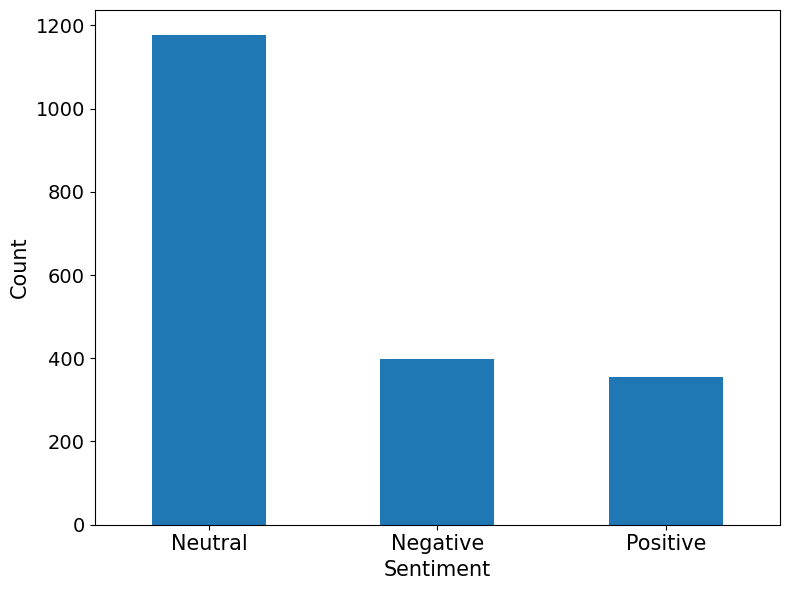

In [106]:
fig, ax = plt.subplots(figsize=(8, 6))  # Optionally, specify figure size
oneplus['RoBERTa-sentiment'].value_counts().plot(kind='bar', ax=ax)

# Set the x-tick labels and rotation
ax.set_xticklabels(['Neutral', 'Negative', 'Positive'], rotation=0, fontsize=15)

# Set the y-axis tick label size
ax.tick_params(axis='y', labelsize=14)
ax.set_xlabel('Sentiment', fontsize=15)
ax.set_ylabel('Count', fontsize=15)

# Display the plot
plt.tight_layout()  # Adjust the layout to prevent overlap
plt.show()

In [107]:
oneplus.head()

,Title,Upvotes,Created,Text,Sentiment-Vader,sentiment,Sentiment,Sentiment-TB,Aspect-Mentions,Sentiment-camera,Sentiment-battery,Sentiment-screen,Sentiment-performance,Sentiment-ai,Sentiment-storage,Sentiment-design,Sentiment-model,comparison,BERT-sentiment,RoBERTa-sentiment
0,is the update policy of 1+ still bi-monthly se...,1,2025-01-11 09:38:53,far understood samsung pixel already received ...,Positive,0.3400,Positive,Positive,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,True,worst,neutral
1,Unable to return my 13 (UK),1,2025-01-11 08:51:20,something wrong website button return seems co...,Negative,-0.4005,Negative,Negative,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,True,worst,negative
2,Reason to upgrade,2,2025-01-11 08:39:04,alright op new hype right ive kind waiting upg...,Positive,0.9891,Positive,Positive,6,Positive,Positive,Positive,Neutral,Positive,Neutral,Neutral,Neutral,True,Good,neutral
3,How does the Spigen case look with the blue ve...,1,2025-01-11 08:35:40,anyone using combo id appreciate could shareba...,Positive,0.9509,Positive,Positive,0,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,True,Average,positive
4,Facing UPI and banking issues on my OP6,1,2025-01-11 08:22:01,op banking apps responding right google pay wo...,Positive,0.1027,Positive,Positive,1,Neutral,Neutral,Positive,Neutral,Neutral,Neutral,Neutral,Neutral,True,Good,positive
